In [13]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
from black_hole_shadows.orbits import generate_orbit, Orbit
from black_hole_shadows.utils import Metric
from black_hole_shadows.plotting import plot_orbits
from black_hole_shadows.sources import Source, Box

In [14]:
# Everything in units of r_s
D = 100
n_points = 100000

def A(r):
    return 1-1/r
def B(r):
    return 1-1/r
def dAdr(r):
    return 1/r**2
def dBdr(r):
    return 1/r**2

metric = Metric(A, B, dAdr, dBdr)

In [11]:
sphere = Source(condition=lambda x: x[0] < 5, coordinates="Spherical")
disc_face_on = Source(condition=lambda x: -0.5 < x[2] < 0.5 and 2 < x[0] < 5, coordinates="Cylindrical")

In [12]:
box = Box(box_size=10, box_points=50)
box.calculate_photon_rays(n_b=50, metric=metric, D=D, b_max=6.8, n_points=n_points)
box.plot_box_orbits()
box.add_source(sphere)
box.plot_source()
box.calculate_pixel_brightness(n_alpha=10)
box.plot_image(smoothing=1)

box.clear_sources()
box.add_source(disc_face_on)
box.plot_source()
box.calculate_pixel_brightness(n_alpha=10)
box.plot_image(smoothing=1)

KeyboardInterrupt: 

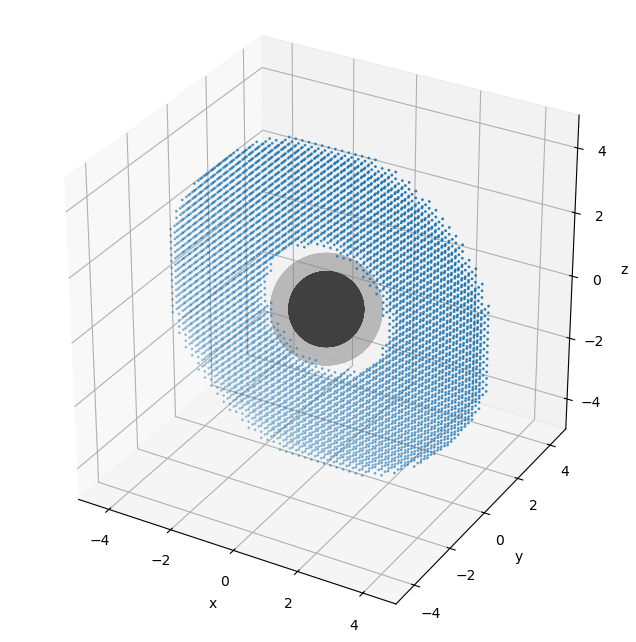

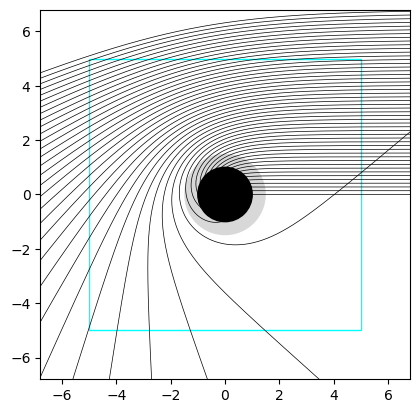

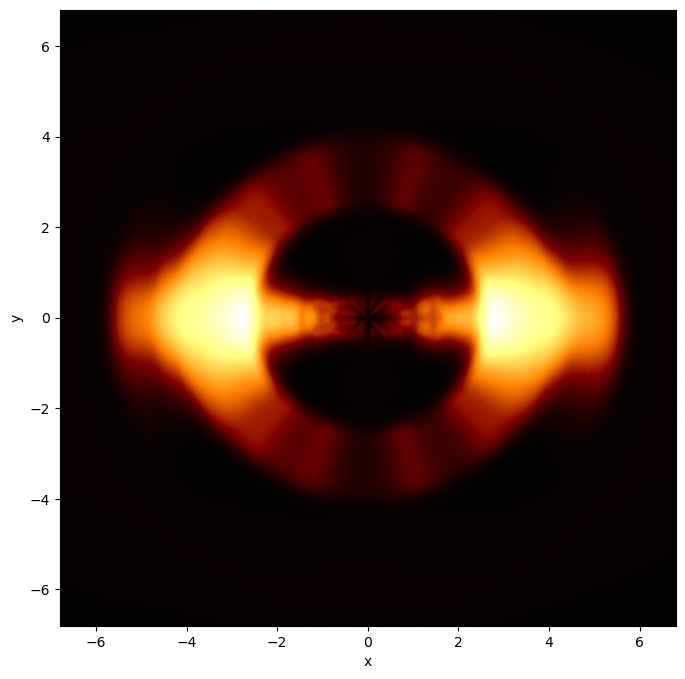

In [ ]:
# Now try an accretion disc with a tilted viewing angle
box = Box(box_size=10, box_points=50, viewing_angles=(np.pi/2,0)) # An edge on disc
box.add_source(disc_face_on)
box.plot_source()
box.calculate_photon_rays(n_b=50, metric=metric, D=D, b_max=6.8, n_points=n_points)
box.plot_box_orbits()
box.calculate_pixel_brightness(n_alpha=50)
box.plot_image(smoothing=1)


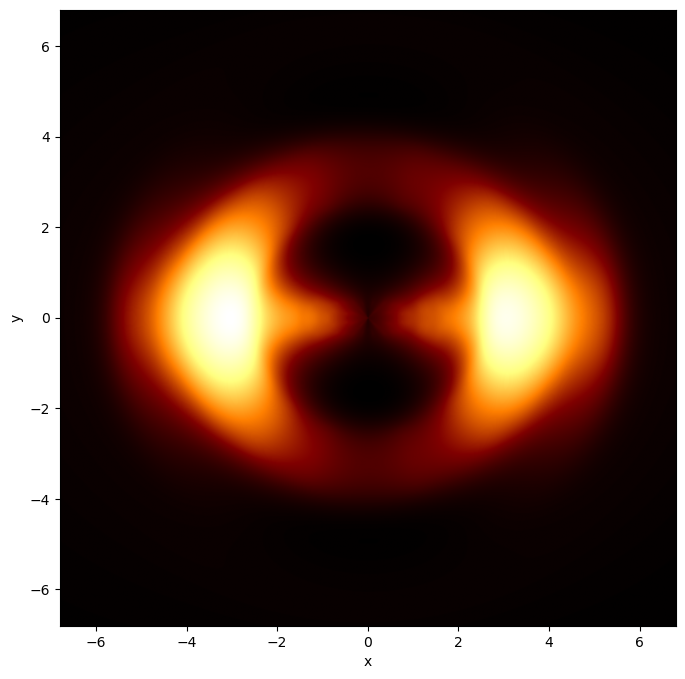

In [ ]:
box.plot_image(smoothing=10)

In [ ]:
box.pixel_brightness.min()

np.float64(0.0)

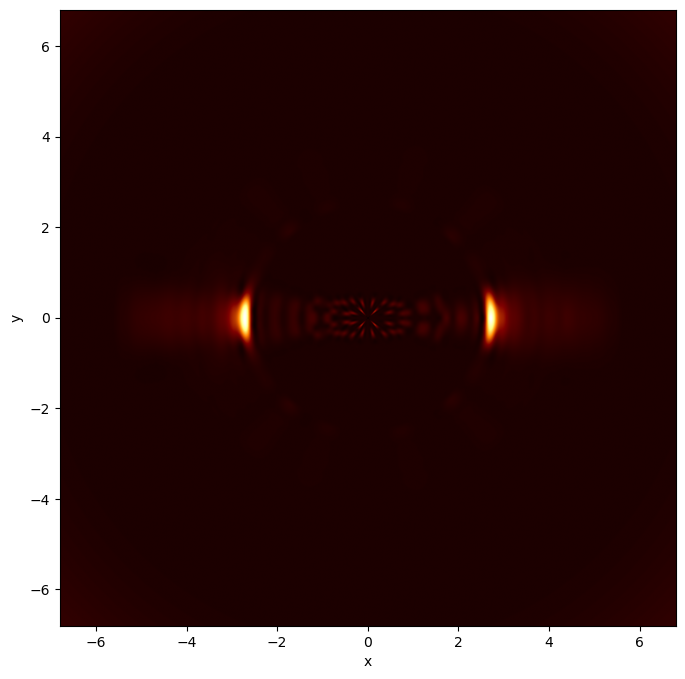

In [ ]:
box.plot_image(smoothing=0, cmap="afmhot")

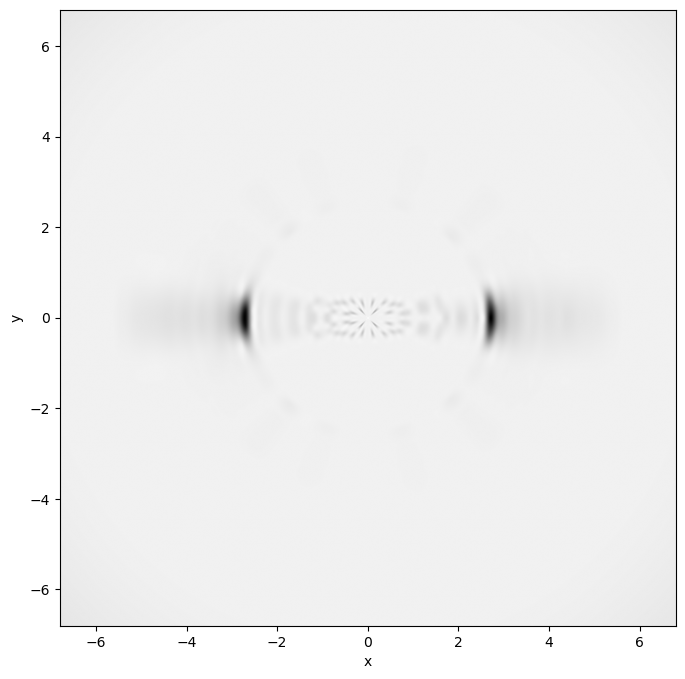

In [ ]:
box.plot_image(smoothing=0, cmap="binary")

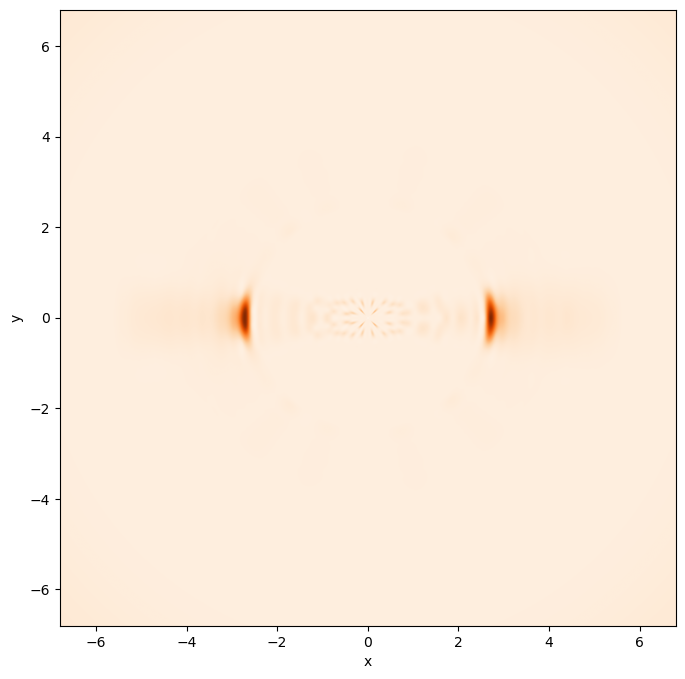

In [ ]:
box.plot_image(smoothing=0, cmap="Oranges")

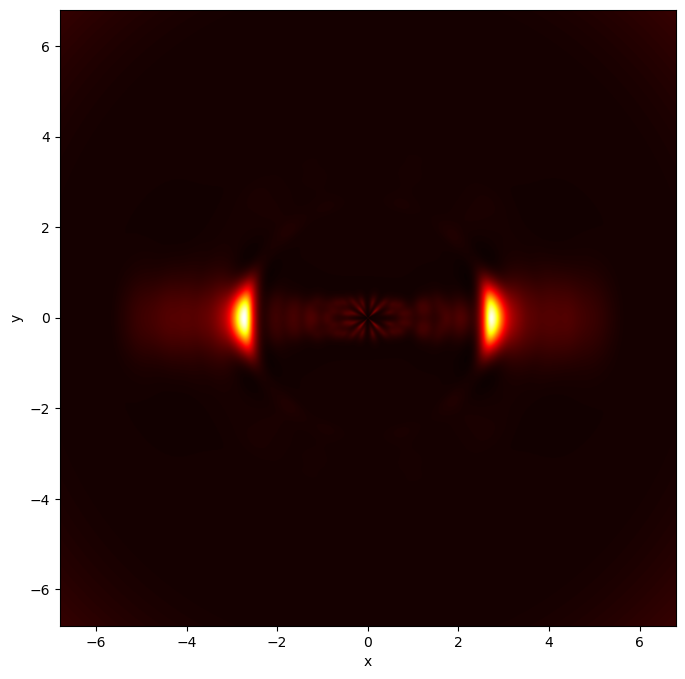

In [ ]:
box.plot_image(smoothing=0.1, cmap="hot")

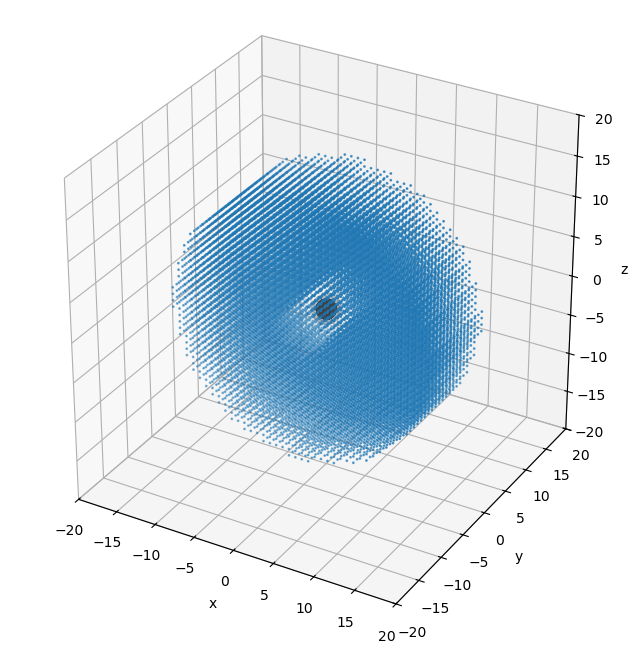

In [ ]:
# Now trying a very thick disc with large inner radius edge on
box = Box(box_size=40, box_points=50, viewing_angles=(np.pi/2,0)) # An edge on disc
disc = Source(condition=lambda x: -13/2 < x[2] < 13/2 and 3 < x[0] < 16, coordinates="Cylindrical")
box.add_source(disc)
box.plot_source()

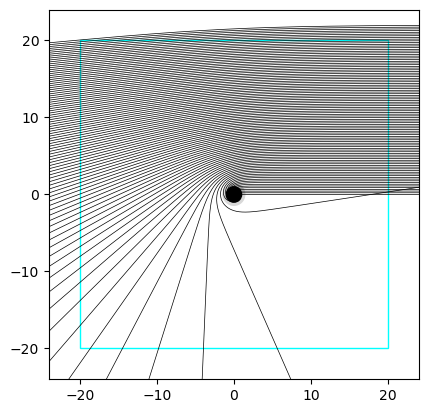

In [ ]:
box.calculate_photon_rays(n_b=100, metric=metric, D=D, b_max=22, n_points=n_points)
box.plot_box_orbits()

In [ ]:
box.calculate_pixel_brightness(n_alpha=50)

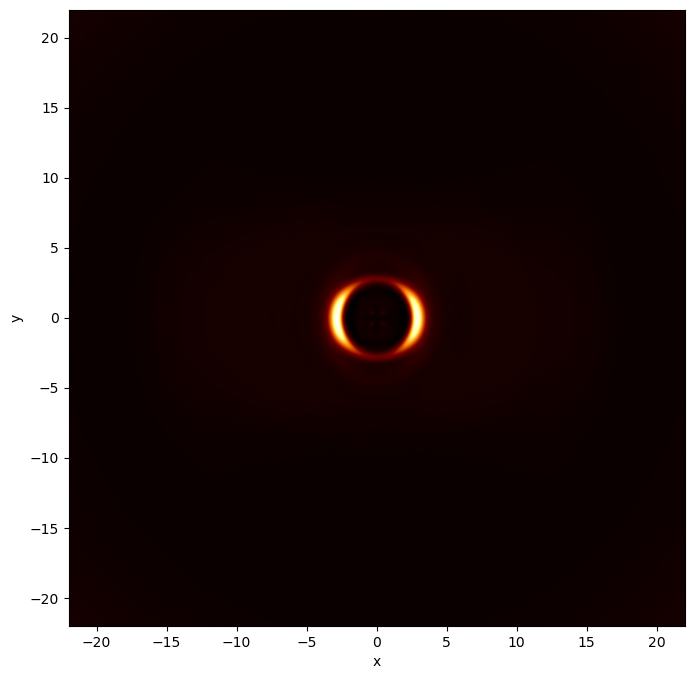

In [ ]:
box.plot_image(smoothing=1)

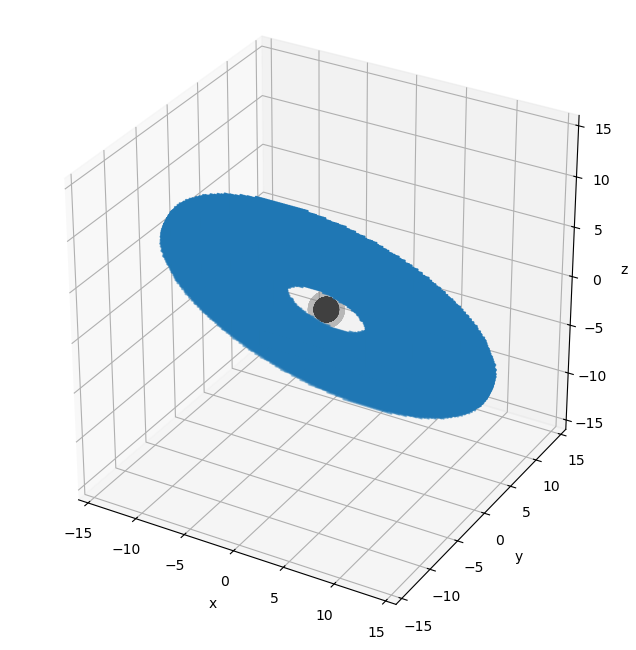

In [15]:
# What about a thin disc at a 60 degree angle
box = Box(box_size=32, box_points=200, viewing_angles=(-np.pi/3,0)) # An edge on disc
disc = Source(condition=lambda x: -0.5 < x[2] < 0.5 and 4 < x[0] < 16, coordinates="Cylindrical")
box.add_source(disc)
box.plot_source()

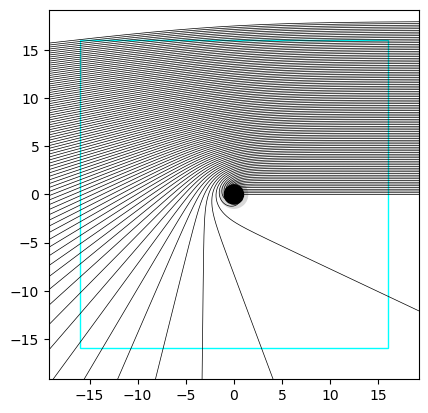

In [16]:
box.calculate_photon_rays(n_b=100, metric=metric, D=D, b_max=18, n_points=n_points)
box.plot_box_orbits()

In [17]:
box.calculate_pixel_brightness(n_alpha=50)

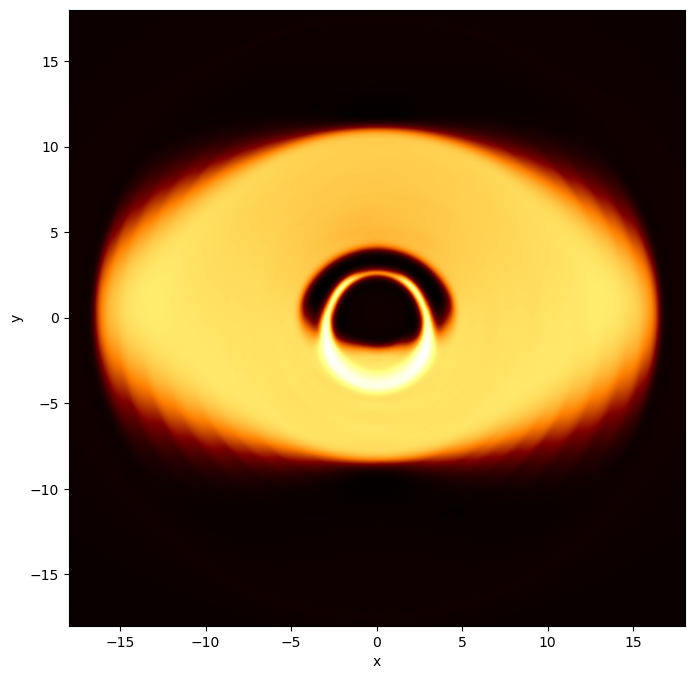

In [21]:
box.plot_image(smoothing=1, cmap="afmhot")

In [ ]:
from scipy.interpolate import RBFInterpolator
def plot_image(self, n_plot_points=1000, smoothing=0, cmap="afmhot", kernel="linear", log=True):
        """Plots the image of the box on the screen based on the pixel brightness."""
        # Flattening the arrays
        pixels_flattened = self.pixels.reshape(-1,2)
        # Recasting the angles to deal with periodicity
        pixels_recast = np.zeros([pixels_flattened.shape[0],3])
        pixels_recast[:,0] = pixels_flattened[:,0]
        pixels_recast[:,1] = np.cos(pixels_flattened[:,1])
        pixels_recast[:,2] = np.sin(pixels_flattened[:,1])
        brightness_flattened = self.pixel_brightness.flatten()
        # Interpolating the brightness values for a smooth plot
        if log:
            # Taking a log to ensure all features are visible
            rbf = RBFInterpolator(pixels_recast, np.log(1+brightness_flattened), smoothing=smoothing, kernel=kernel)
        else:
            rbf = RBFInterpolator(pixels_recast, brightness_flattened, smoothing=smoothing, kernel=kernel)
        # Creating an x,y grid for plotting
        x = self.pixels[:,:,0] * np.cos(self.pixels[:,:,1])
        y = self.pixels[:,:,0] * np.sin(self.pixels[:,:,1])
        xi = np.linspace(-np.max(self.b_values), np.max(self.b_values), n_plot_points)
        yi = np.linspace(-np.max(self.b_values), np.max(self.b_values), n_plot_points)
        xi, yi = np.meshgrid(xi, yi, indexing="ij")
        brightness_interpolated = rbf(np.transpose(np.array([np.sqrt(xi.flatten()**2 + yi.flatten()**2), xi.flatten()/np.sqrt(xi.flatten()**2 + yi.flatten()**2), yi.flatten()/np.sqrt(xi.flatten()**2 + yi.flatten()**2)])))
        # Plotting the image
        plt.figure(figsize=(8,8))
        # Taking a log to ensure all features are shown
        plt.imshow(brightness_interpolated.reshape(xi.shape).T, extent=(xi.min(), xi.max(), yi.min(), yi.max()), origin="lower", cmap=cmap)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

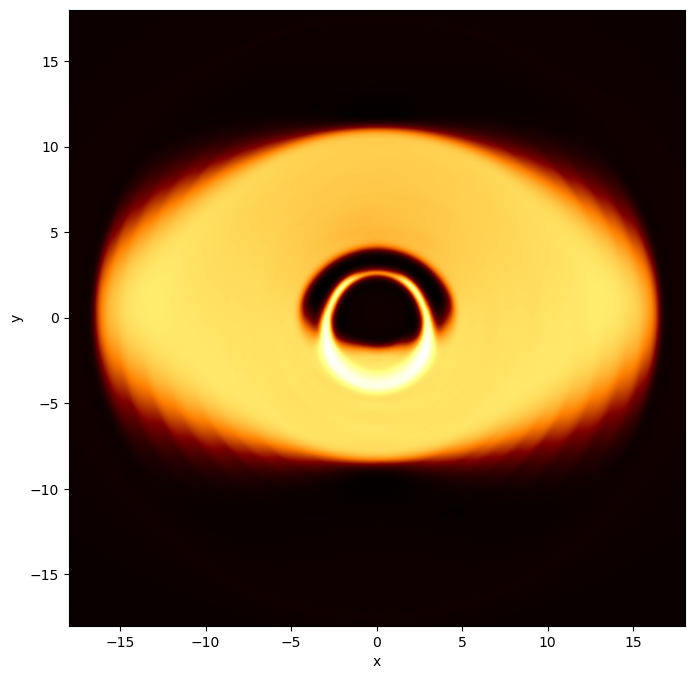

In [23]:
plot_image(box, smoothing=1)

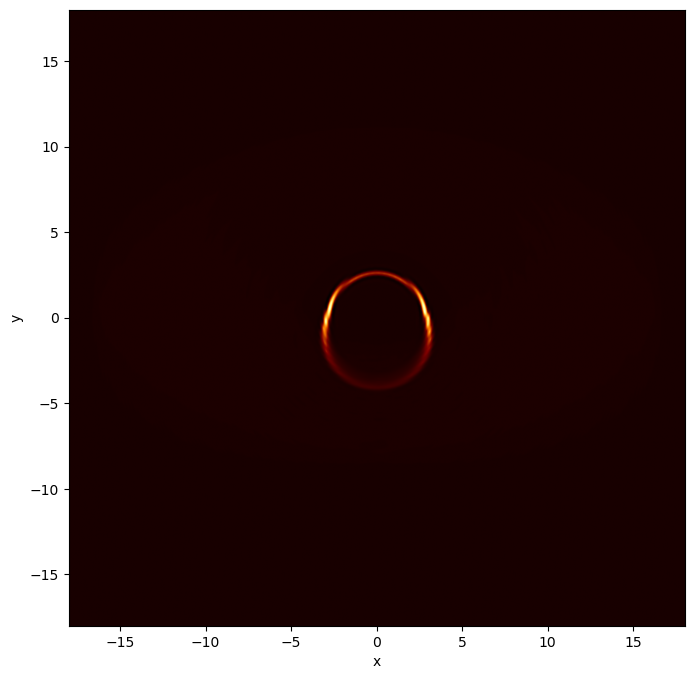

In [28]:
plot_image(box, smoothing=0, log=False)